Goal: Assess relative impact of temperature and nutrients (N and Si) on the ratio of diatom growth to flagellate growth

In [12]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from salishsea_tools import bio_tools as bt, places
import xarray as xr
import os
import glob
%matplotlib inline

In [3]:
nml=bt.load_nml_bio(resDir='/ocean/eolson/MEOPAR/NEMO-3.6-code/NEMOGCM/CONFIG/SalishSeaCast/EXP00/',
                 nmlname='nampisprod',bioRefName='namelist_smelt_cfg_HC201905equiv',bioCfgName='namelist_smelt_cfg_HC201905equiv')

In [4]:
nml

Namelist([('zz_rate_r_diat', 6.0495e-05),
          ('zz_rate_r_myri', 2.22e-05),
          ('zz_rate_r_nano', 2.109e-05),
          ('zz_rate_maxtemp_diat', 26.0),
          ('zz_rate_maxtemp_myri', 31.0),
          ('zz_rate_maxtemp_nano', 31.0),
          ('zz_rate_temprange_diat', 14.0),
          ('zz_rate_temprange_myri', 13.0),
          ('zz_rate_temprange_nano', 13.0),
          ('zz_rate_iopt_diat', 45.0),
          ('zz_rate_iopt_myri', 37.0),
          ('zz_rate_iopt_nano', 10.0),
          ('zz_rate_gamma_diat', 0.0),
          ('zz_rate_gamma_myri', 0.0),
          ('zz_rate_gamma_nano', 0.0),
          ('zz_rate_k_si_diat', 2.2),
          ('zz_rate_k_si_myri', 0.0),
          ('zz_rate_k_si_nano', 0.0),
          ('zz_rate_kapa_diat', 1.0),
          ('zz_rate_kapa_myri', 0.5),
          ('zz_rate_kapa_nano', 0.3),
          ('zz_rate_k_diat', 2.0),
          ('zz_rate_k_myri', 0.5),
          ('zz_rate_k_nano', 0.2),
          ('zz_rate_si_ratio_diat', 1.8),
          

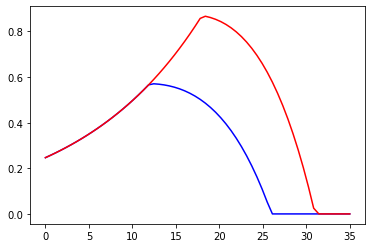

In [7]:
t=np.linspace(0,35,60)
TdepD,TdepM,TdepF=bt.calc_T_Factors(t,nml)
plt.plot(t,TdepD,'b-')
plt.plot(t,TdepF,'r-')

In [10]:
np.sort(glob.glob('/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_2019*'))

array(['/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_20190101_20190131.nc',
       '/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_20190201_20190228.nc',
       '/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_20190301_20190331.nc',
       '/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_20190401_20190430.nc',
       '/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_20190501_20190531.nc',
       '/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_20190601_20190630.nc',
       '/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_20190701_20190731.nc',
       '/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_20190801_20190831.nc',
       '/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_20190901_20190930.nc',
       '/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_20191001_20191031.nc',
       '/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_20191101_20

In [11]:
T2008=xr.open_mfdataset(np.sort(glob.glob('/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_2008*')))
T2019=xr.open_mfdataset(np.sort(glob.glob('/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_grid_T_2019*')))

In [19]:
T2008

<xarray.Dataset>
Dimensions:   (depth: 40, gridX: 398, gridY: 898, time: 12)
Coordinates:
  * time      (time) datetime64[ns] 2008-01-15T12:00:00 ... 2008-12-15T12:00:00
  * gridY     (gridY) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX     (gridX) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
  * depth     (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
Data variables:
    sossheig  (time, gridY, gridX) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    votemper  (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    vosaline  (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSeaCast_1m_grid_T_20080101_20080131
    description:  Month-averaged physics tracer variables extracted from Sali...
    history:      2022-06-17 12:13: Generated by `reshapr extract /results2/S...
    Conventions:  CF-1.6

In [13]:
places.PLACES['S3']

{'lon lat': (-123.558, 49.125),
 'NEMO grid ji': (450, 258),
 'GEM2.5 grid ji': (138, 144)}

In [14]:
j,i=places.PLACES['S3']['NEMO grid ji']

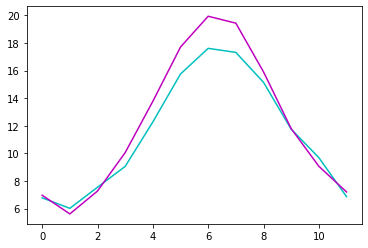

In [23]:
plt.plot(T2008.votemper[:,0,j,i],'c-')
plt.plot(T2019.votemper[:,0,j,i],'m-')

In [28]:
T2008.votemper[:,0,j,i].values

array([ 6.7758446,  6.0135984,  7.545412 ,  9.055808 , 12.278174 ,
       15.752482 , 17.611877 , 17.31771  , 15.147441 , 11.750376 ,
        9.689218 ,  6.860839 ], dtype=float32)

In [29]:
TdepDiat2008,__,TdepNano2008=bt.calc_T_Factors(T2008.votemper[:,0,j,i].values,nml)
TdepDiat2019,__,TdepNano2019=bt.calc_T_Factors(T2019.votemper[:,0,j,i].values,nml)

Text(0.5, 0, 'Month')

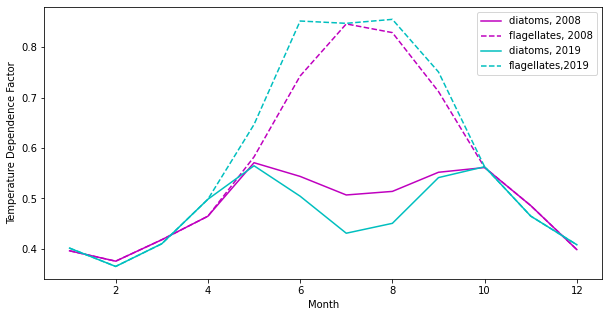

In [35]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
months=np.arange(1,13)
ax.plot(months,TdepDiat2008,'m-',label='diatoms, 2008')
ax.plot(months,TdepNano2008,'m--',label='flagellates, 2008')
ax.plot(months,TdepDiat2019,'c-',label='diatoms, 2019')
ax.plot(months,TdepNano2019,'c--',label='flagellates,2019')
ax.legend()
ax.set_ylabel('Temperature Dependence Factor')
ax.set_xlabel('Month')

Text(0.5, 0, 'Month')

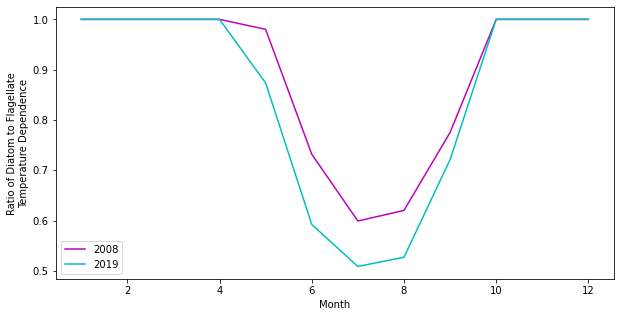

In [36]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
months=np.arange(1,13)
ax.plot(months,TdepDiat2008/TdepNano2008,'m-',label='2008')
ax.plot(months,TdepDiat2019/TdepNano2019,'c-',label='2019')
ax.legend()
ax.set_ylabel('Ratio of Diatom to Flagellate\nTemperature Dependence')
ax.set_xlabel('Month')

In [37]:
N2008=xr.open_mfdataset(np.sort(glob.glob('/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_ptrc_T_2008*')))
N2019=xr.open_mfdataset(np.sort(glob.glob('/results2/SalishSea/month-avg.201905/SalishSeaCast_1m_ptrc_T_2019*')))

In [45]:
# for now just set light to constant and ignore 'limiter' and 'limval'
DiatLim2008, __, NanoLim2008 = bt.calc_p_limiters(10*np.ones(np.shape(N2008.nitrate[:,0,j,i].values)),
                                               NO=N2008.nitrate[:,0,j,i].values,
                                               NH=N2008.ammonium[:,0,j,i].values,
                                               Si=N2008.silicon[:,0,j,i].values,
                                               tmask=np.ones(np.shape(N2008.nitrate[:,0,j,i].values)),
                                               nampisprod=nml)

In [46]:
DiatLim2019, __, NanoLim2019 = bt.calc_p_limiters(10*np.ones(np.shape(N2019.nitrate[:,0,j,i].values)),
                                               NO=N2019.nitrate[:,0,j,i].values,
                                               NH=N2019.ammonium[:,0,j,i].values,
                                               Si=N2019.silicon[:,0,j,i].values,
                                               tmask=np.ones(np.shape(N2019.nitrate[:,0,j,i].values)),
                                               nampisprod=nml)

In [47]:
DiatLim2008

{'ILim': array([0.51559692, 0.51559692, 0.51559692, 0.51559692, 0.51559692,
        0.51559692, 0.51559692, 0.51559692, 0.51559692, 0.51559692,
        0.51559692, 0.51559692]),
 'NLim': array([0.92880577, 0.92175853, 0.9210142 , 0.8045783 , 0.7270299 ,
        0.4974663 , 0.5751092 , 0.7393524 , 0.82537663, 0.9001909 ,
        0.9228168 , 0.92372626], dtype=float32),
 'SiLim': array([0.9580495 , 0.9591746 , 0.95826507, 0.90415525, 0.6706842 ,
        0.8233204 , 0.77513295, 0.8142121 , 0.9004654 , 0.93276787,
        0.9502825 , 0.95533967], dtype=float32),
 'limiter': array([0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.]),
 'limval': array([0.51559692, 0.51559692, 0.51559692, 0.51559692, 0.51559692,
        2.49746633, 0.51559692, 0.51559692, 0.51559692, 0.51559692,
        0.51559692, 0.51559692])}

Text(0.5, 0, 'Month')

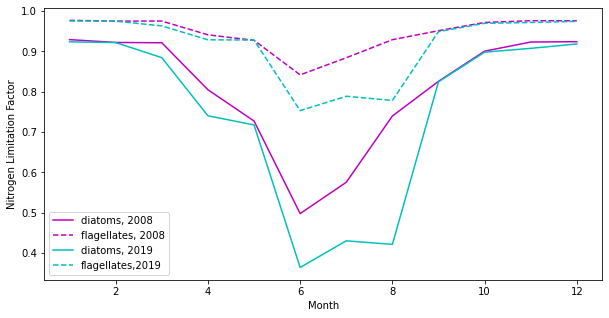

In [48]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
months=np.arange(1,13)
ax.plot(months,DiatLim2008['NLim'],'m-',label='diatoms, 2008')
ax.plot(months,NanoLim2008['NLim'],'m--',label='flagellates, 2008')
ax.plot(months,DiatLim2019['NLim'],'c-',label='diatoms, 2019')
ax.plot(months,NanoLim2019['NLim'],'c--',label='flagellates,2019')
ax.legend()
ax.set_ylabel('Nitrogen Limitation Factor')
ax.set_xlabel('Month')

Text(0.5, 0, 'Month')

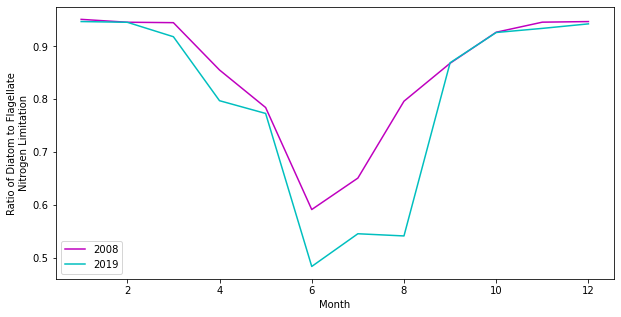

In [49]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
months=np.arange(1,13)
ax.plot(months,DiatLim2008['NLim']/NanoLim2008['NLim'],'m-',label='2008')
ax.plot(months,DiatLim2019['NLim']/NanoLim2019['NLim'],'c-',label='2019')
ax.legend()
ax.set_ylabel('Ratio of Diatom to Flagellate\nNitrogen Limitation')
ax.set_xlabel('Month')

Text(0.5, 0, 'Month')

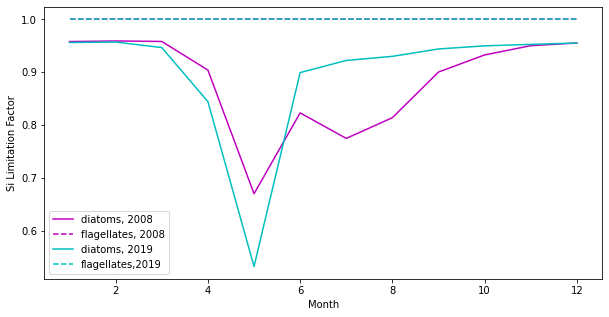

In [50]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
months=np.arange(1,13)
ax.plot(months,DiatLim2008['SiLim'],'m-',label='diatoms, 2008')
ax.plot(months,NanoLim2008['SiLim'],'m--',label='flagellates, 2008')
ax.plot(months,DiatLim2019['SiLim'],'c-',label='diatoms, 2019')
ax.plot(months,NanoLim2019['SiLim'],'c--',label='flagellates,2019')
ax.legend()
ax.set_ylabel('Si Limitation Factor')
ax.set_xlabel('Month')

Text(0.5, 0, 'Month')

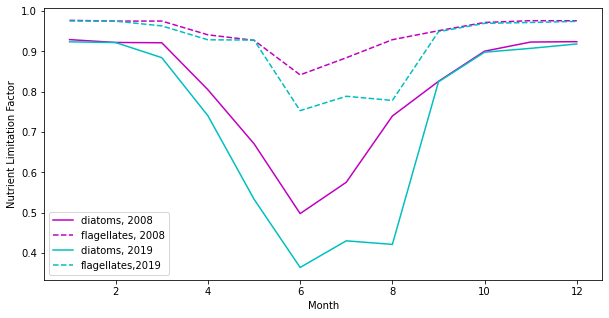

In [51]:
NutLimDiat2008=np.where(DiatLim2008['SiLim']<DiatLim2008['NLim'],DiatLim2008['SiLim'],DiatLim2008['NLim'])
NutLimNano2008=NanoLim2008['NLim']
NutLimDiat2019=np.where(DiatLim2019['SiLim']<DiatLim2019['NLim'],DiatLim2019['SiLim'],DiatLim2019['NLim'])
NutLimNano2019=NanoLim2019['NLim']

fig,ax=plt.subplots(1,1,figsize=(10,5))
months=np.arange(1,13)
ax.plot(months,NutLimDiat2008,'m-',label='diatoms, 2008')
ax.plot(months,NutLimNano2008,'m--',label='flagellates, 2008')
ax.plot(months,NutLimDiat2019,'c-',label='diatoms, 2019')
ax.plot(months,NutLimNano2019,'c--',label='flagellates,2019')
ax.legend()
ax.set_ylabel('Nutrient Limitation Factor')
ax.set_xlabel('Month')

Text(0.5, 0, 'Month')

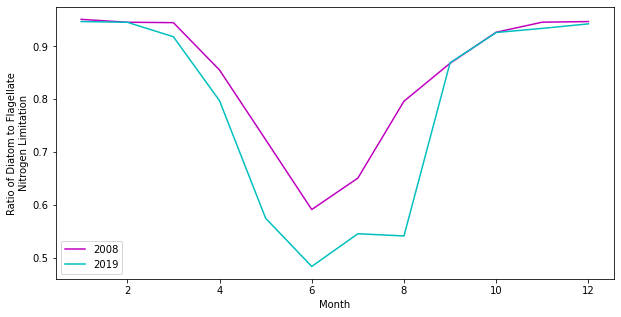

In [52]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
months=np.arange(1,13)
ax.plot(months,NutLimDiat2008/NutLimNano2008,'m-',label='2008')
ax.plot(months,NutLimDiat2019/NutLimNano2019,'c-',label='2019')
ax.legend()
ax.set_ylabel('Ratio of Diatom to Flagellate\nNitrogen Limitation')
ax.set_xlabel('Month')

Text(0.5, 0, 'Month')

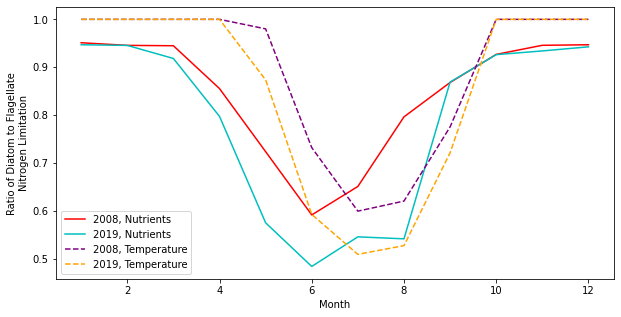

In [55]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
months=np.arange(1,13)
ax.plot(months,NutLimDiat2008/NutLimNano2008,'r-',label='2008, Nutrients')
ax.plot(months,NutLimDiat2019/NutLimNano2019,'c-',label='2019, Nutrients')
ax.plot(months,TdepDiat2008/TdepNano2008,'--',color='purple',label='2008, Temperature')
ax.plot(months,TdepDiat2019/TdepNano2019,'--',color='orange',label='2019, Temperature')
ax.legend()
ax.set_ylabel('Ratio of Diatom to Flagellate\nNitrogen Limitation')
ax.set_xlabel('Month')

## Now plot diatom to flagellate ratios when responses are considered in isolation:
\* these rates would never occur in the model, even under repleat/optimal conditions, as the maximum of the nutrient and temperature responses are not equal to 1. 

In [57]:
mumaxDiat=nml['zz_rate_r_diat']
mumaxNano=nml['zz_rate_r_nano']

Text(0.5, 0, 'Month')

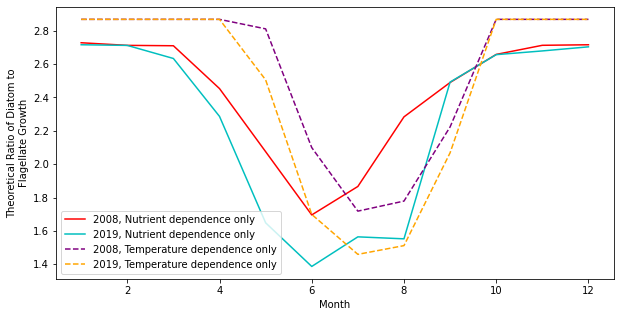

In [63]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
months=np.arange(1,13)
ax.plot(months,mumaxDiat/mumaxNano*NutLimDiat2008/NutLimNano2008,'r-',label='2008, Nutrient dependence only')
ax.plot(months,mumaxDiat/mumaxNano*NutLimDiat2019/NutLimNano2019,'c-',label='2019, Nutrient dependence only')
ax.plot(months,mumaxDiat/mumaxNano*TdepDiat2008/TdepNano2008,'--',color='purple',label='2008, Temperature dependence only')
ax.plot(months,mumaxDiat/mumaxNano*TdepDiat2019/TdepNano2019,'--',color='orange',label='2019, Temperature dependence only')
ax.plot(months,mumaxDiat/mumaxNano*TdepDiat2008/TdepNano2008*NutLimDiat2008/NutLimNano2008,'--',color='purple',label='2008, both')
ax.plot(months,mumaxDiat/mumaxNano*TdepDiat2019/TdepNano2019,'--',color='orange',label='2019, both')
ax.legend()
ax.set_ylabel('Theoretical Ratio of Diatom to\nFlagellate Growth')
ax.set_xlabel('Month')